In [2]:
from datascience import *
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [8]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def fitted_value(t, x, y, new_x):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*new_x + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

# Actors

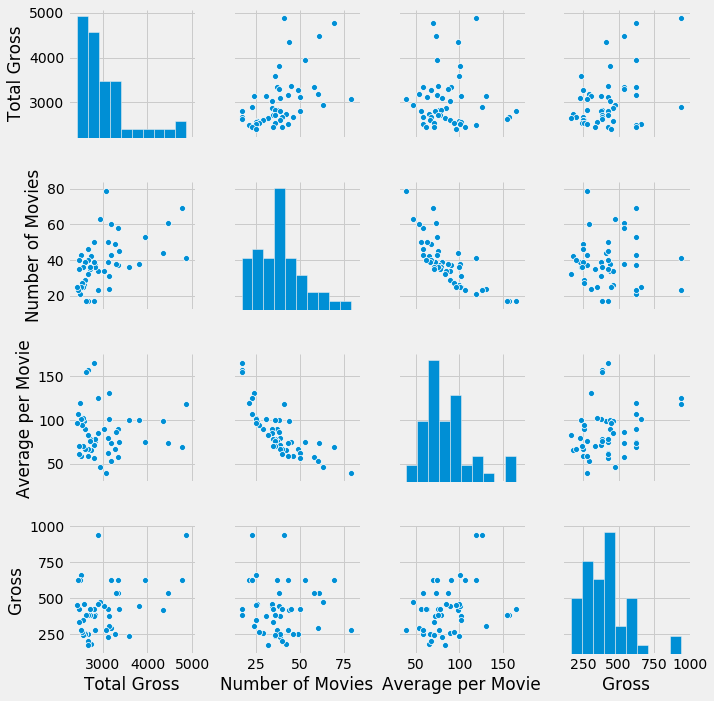

In [13]:
sns.pairplot(actors_df[actors_df['Number of Movies'] > 10])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

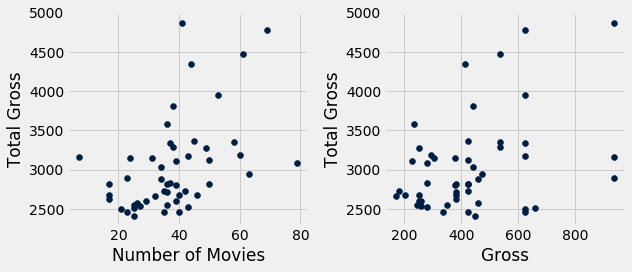

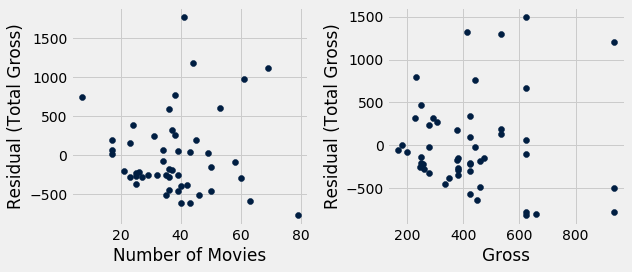

In [9]:
actors_df = pd.read_csv('actors.csv')
actors = Table.from_df(actors_df)
color = (0.0, 30/256, 66/256)

def myplot(tbl, x, y, residual=False):
    if residual:
        ycol = residuals(actors, x, y)
        ylabel = f'Residual ({y})'
    else:
        ycol = actors[y]
        ylabel = y
    plt.scatter(actors[x], ycol, c=color)
    plt.xlabel(x)
    plt.ylabel(ylabel)
    
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
myplot(actors_df, 'Number of Movies', 'Total Gross')
plt.subplot(1, 2, 2)
myplot(actors_df, 'Gross', 'Total Gross')
plt.tight_layout()

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
myplot(actors_df, 'Number of Movies', 'Total Gross', True)
plt.subplot(1, 2, 2)
myplot(actors_df, 'Gross', 'Total Gross', True)
plt.tight_layout()


# Books

In [286]:
np.random.seed(4)
percent_fiction = 0.62
colors  = np.array(['Blue', 'Green', 'White', 'Red', 'Yellow', 'Orange', 'Multicolored'])
weights = np.array([0.3,    0.07,     0.25,    0.14, 0.03,     0.14,     0.4])

In [327]:
x = np.hstack((
    np.log(np.random.random(300)*8 + 1),
    np.random.normal(2, .5, 50),
    np.random.normal(1, 1, 20)
))
book_lengths = (x * 100 + 80).astype('int64')
length_bins = np.arange(50, 400, 25)
num_books = book_lengths.size

In [328]:
probs = weights / np.sum(weights)

In [329]:
np.median(book_lengths)

247.5

In [330]:
np.mean(book_lengths)

229.48918918918918

In [334]:
book_colors = np.random.choice(colors, num_books, p=probs)
is_fiction = np.random.random(num_books) > percent_fiction
book_ages = np.abs(np.random.standard_t(10, num_books) + 1) * 50
rating_noise = np.random.random(num_books) * 5
rating_exact_length = book_lengths - book_lengths.min()
rating_exact_length = rating_exact_length / rating_exact_length.max() * 5.0
rating = .5 * rating_noise + .5 * rating_exact_length

books = Table().with_columns(
    'Length', book_lengths,
    'Color', book_colors,
    'Fiction', is_fiction,
    'Age', book_ages,
    'Rating', rating,
)


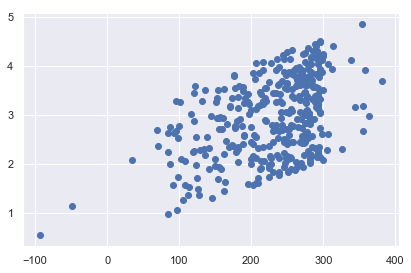

In [335]:
plt.scatter(book_lengths, rating)

In [347]:
correlation(books, 'Length', 'Rating')

0.46207281245584053

In [348]:
lengths = books.column('Length')
np.mean(lengths), np.std(lengths)

(229.48918918918918, 65.7005174350589)

In [349]:
ratings = books.column('Rating')
np.mean(ratings), np.std(ratings)

(2.947798167023057, 0.8005543529502627)

In [298]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def fitted_value(t, x, y, new_x):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*new_x + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [297]:
rando_ratings = pd.read_csv('goodreads_zief.csv')
rando_ratings = rando_ratings[(rando_ratings.avg_rating > 2) & (rando_ratings.pages < 600)]
np.corrcoef(rando_ratings.avg_rating, rando_ratings.pages)

array([[1.       , 0.1309486],
       [0.1309486, 1.       ]])

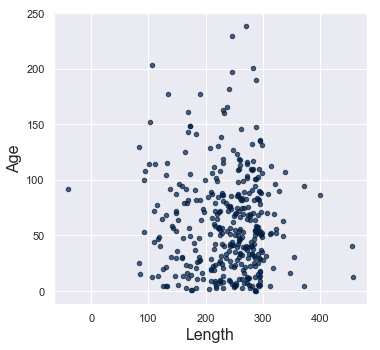

In [293]:
books.scatter('Length', 'Age')

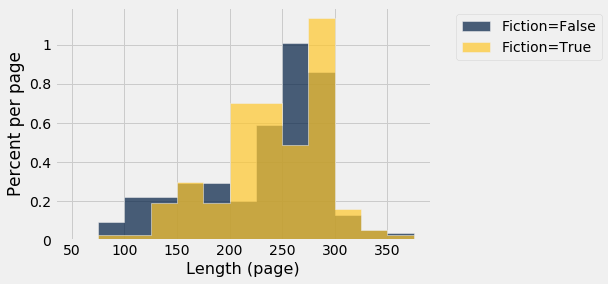

In [36]:
books.hist('Length', group='Fiction', unit='page', bins=length_bins)

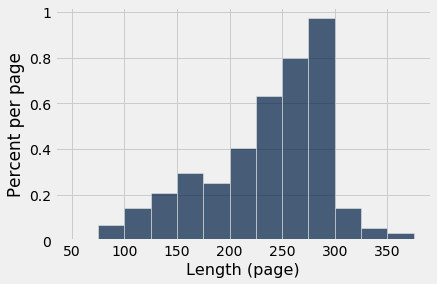

In [35]:
books.hist('Length', unit='page', bins=length_bins)

# Plants

In [86]:
def generate_random_plants(seed, num_plants=30):
    """Great argument name, or greatest argument name?"""
    np.random.seed(seed)
    water = np.sort(np.random.uniform(.8, 7.2, num_plants))
    pot_sizes_1 = np.random.gamma(2, 2, int(num_plants * .75))/8
    pot_sizes_2 = np.random.uniform(1, 3, num_plants - pot_sizes_1.size)
    pot_sizes = np.append(pot_sizes_1, pot_sizes_2)
    pred = pot_sizes * 4/3 + 1
    survived = np.abs(water - pred) < 1.25
    random_flip = np.random.random(num_plants) < .2
    survived[random_flip] = np.logical_not(survived[random_flip])
    return water, pot_sizes, survived

def plot_plants(water, pot_sizes, survived):
    plt.figure(figsize=(4, 7))
    plt.scatter(pot_sizes[survived], water[survived], c='tab:blue', marker='o', label='Survived=True')
    plt.scatter(pot_sizes[~survived], water[~survived], c='tab:red', marker='s', label='Survived=False')
    plt.ylabel('Water')
    plt.xlabel('Pot Size')
    plt.axis('equal')
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1))


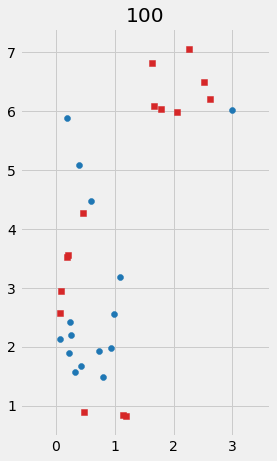

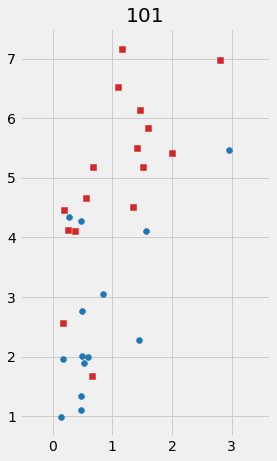

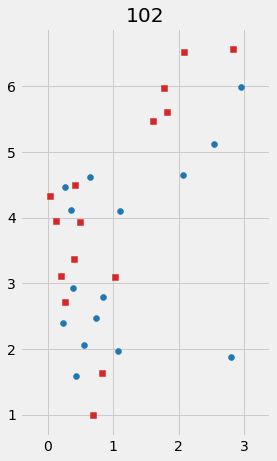

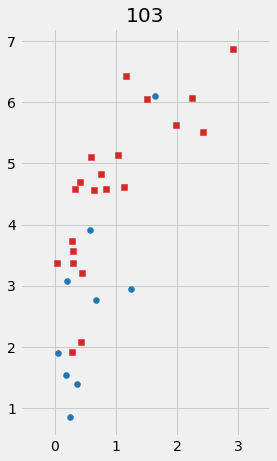

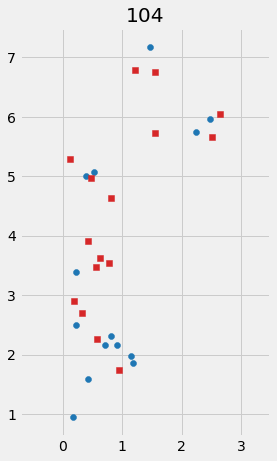

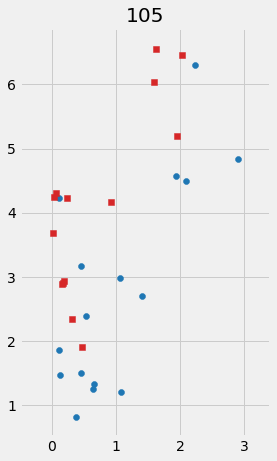

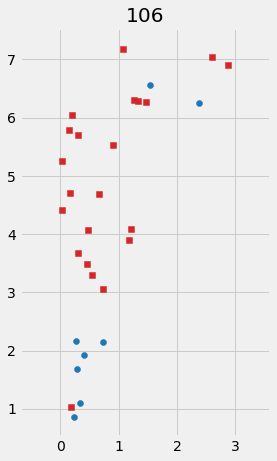

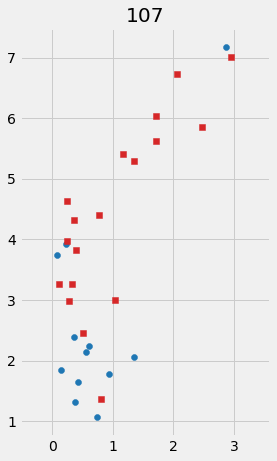

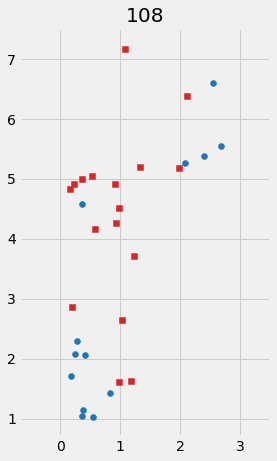

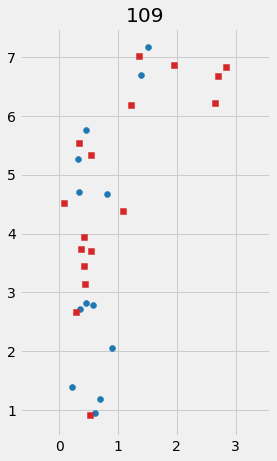

In [79]:
# Try to find a good random configuration
for seed in range(100, 110):
    water, pot_sizes, survived = generate_random_plants(seed)
    plot_plants(water, pot_sizes, survived)
    plt.title(seed)


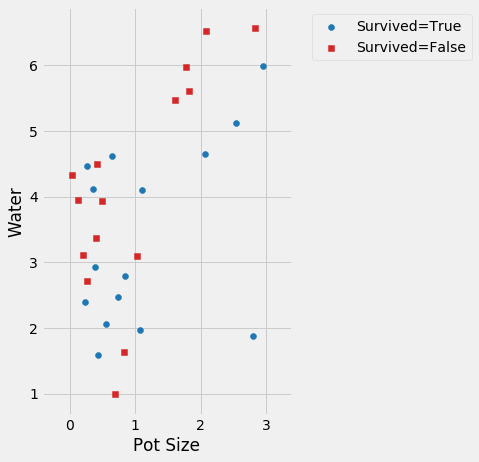

In [87]:
water, pot_sizes, survived = generate_random_plants(102)
plot_plants(water, pot_sizes, survived)


# Electricity

In [222]:
def remove_outliers(df, pctile_threshold=90, col_names=None):
    from pandas.api.types import is_numeric_dtype
    new = df.copy()
    mask = np.ones(df.shape[0], dtype=bool)
    if col_names is None:
        col_names = df.columns
    for col_name in col_names:
        column = df[col_name]
        if is_numeric_dtype(column):
            this = (column.values < np.percentile(column.values, pctile_threshold))
            mask &= this
            print(col_name, this.mean(), mask.mean())
    return new.loc[mask, :]

In [208]:
elec = pd.read_csv('electricity.csv')
elec.head()

Utility.Number                  Utility.Name Utility.State Utility.Type  \
0              55       City of Aberdeen - (MS)            MS    Municipal   
1              59      City of Abbeville - (LA)            LA    Municipal   
2              84           A & N Electric Coop            VA  Cooperative   
3              97           Adams Electric Coop            IL  Cooperative   
4             108  Adams-Columbia Electric Coop            WI  Cooperative   

   Demand.Summer Peak  Demand.Winter Peak  Sources.Generation  \
0                32.7                30.7                 0.0   
1                31.4                22.9                 0.0   
2               152.6               156.1                19.0   
3                37.0                37.0              4677.0   
4               109.1                83.4                 0.0   

   Sources.Purchased  Sources.Other  Sources.Total           ...            \
0           204875.0            0.0       204875.0           ...             
1           137537.0            0.0       137537.0           ...             
2           714961.0            0.0       714980.0           ...             
3           170432.0            0.0       175109.0           ...             
4           524637.0            0.0       524637.0           ...             

   Retail.Commercial.Customers  Retail.Industrial.Revenue  \
0                        661.0                     6025.0   
1                       1032.0                     3211.8   
2                       4019.0                    13952.7   
3                        222.0                        0.0   
4                       2074.0                    15398.0   

   Retail.Industrial.Sales  Retail.Industrial.Customers  \
0                 118989.0                          2.0   
1                  37566.0                         27.0   
2                 169301.0                          8.0   
3                      0.0                          0.0   
4                 160275.0                        926.0   

   Retail.Transportation.Revenue  Retail.Transportation.Sales  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   Retail.Transportation.Customers  Retail.Total.Revenue  Retail.Total.Sales  \
0                              0.0               14649.0            198442.0   
1                              0.0               12574.4            127849.0   
2                              0.0               68496.7            672572.0   
3                              0.0               22070.0            164358.0   
4                              0.0               67563.0            493241.0   

   Retail.Total.Customers  
0                  3258.0  
1                  5523.0  
2                 35610.0  
3                  8825.0  
4                 37138.0  

[5 rows x 38 columns]

In [250]:
electricity = pd.DataFrame({
    'Name': elec['Utility.Name'],
    'State': elec['Utility.State'],
    'Type': elec['Utility.Type'],
    'Residential customers': elec['Retail.Residential.Customers'].astype(np.int32),
#    'Industrial customers': elec['Retail.Industrial.Customers'].astype(np.int32),
#    'Commercial customers': elec['Retail.Commercial.Customers'].astype(np.int32),
    'Revenue': elec['Revenue.Total'],
    'Power generated': elec['Sources.Generation'],
    'Power bought': elec['Sources.Other'] + elec['Sources.Purchased'],
    'Power in': elec['Sources.Other'] + elec['Sources.Purchased'] + elec['Sources.Generation'],
    'Summer demand': elec['Demand.Summer Peak'],
    'Winter demand': elec['Demand.Winter Peak'],
})
electricity = remove_outliers(
    electricity, 
    75, 
    ('Residential customers', 
#     'Industrial customers', 'Commercial customers', 
     'Revenue', 'Power in', 'Winter demand', 'Summer demand')
)
#electricity = electricity[
#    electricity['Residential customers'] + electricity['Industrial customers'] + electricity['Commercial customers'] > 0
#]
electricity = electricity[
    electricity['Residential customers'] > 0
]
electricity = electricity.sort_values('Power generated', ascending=True)
electricity.to_csv('electricity2017.csv', index=False)
electricity.sample(n=200, replace=False).to_csv('electricity2017_sample.csv', index=False)

Residential customers 0.75 0.75
Revenue 0.75 0.7022684310018904
Power in 0.75 0.6862003780718336
Winter demand 0.75 0.6668241965973535
Summer demand 0.75 0.6573724007561437


In [258]:
elec.groupby('Utility.Type').mean()['Retail.Residential.Customers']

Utility.Type
Behind the Meter                43416.142857
Community Choice Aggregator    106222.222222
Cooperative                     22952.609788
Federal                          5106.400000
Investor Owned                 590608.210526
Municipal                       16251.996364
Political Subdivision           44670.922078
Retail Power Marketer           57111.970149
State                          134279.222222
Wholesale Power Marketer            0.000000
Name: Retail.Residential.Customers, dtype: float64

In [262]:
electricity.groupby('Type').count()

Name  State  Residential customers  Revenue  \
Type                                                                       
Behind the Meter                5      5                      5        5   
Community Choice Aggregator     2      2                      2        2   
Cooperative                   476    475                    476      476   
Federal                         2      2                      2        2   
Investor Owned                 20     20                     20       20   
Municipal                     681    681                    681      681   
Political Subdivision          39     39                     39       39   
Retail Power Marketer         116    116                    116      116   
State                           3      3                      3        3   

                             Power generated  Power bought  Power in  \
Type                                                                   
Behind the Meter                           5             5         5   
Community Choice Aggregator                2             2         2   
Cooperative                              476           476       476   
Federal                                    2             2         2   
Investor Owned                            20            20        20   
Municipal                                681           681       681   
Political Subdivision                     39            39        39   
Retail Power Marketer                    116           116       116   
State                                      3             3         3   

                             Summer demand  Winter demand  
Type                                                       
Behind the Meter                         5              5  
Community Choice Aggregator              2              2  
Cooperative                            476            476  
Federal                                  2              2  
Investor Owned                          20             20  
Municipal                              681            681  
Political Subdivision                   39             39  
Retail Power Marketer                  116            116  
State                                    3              3

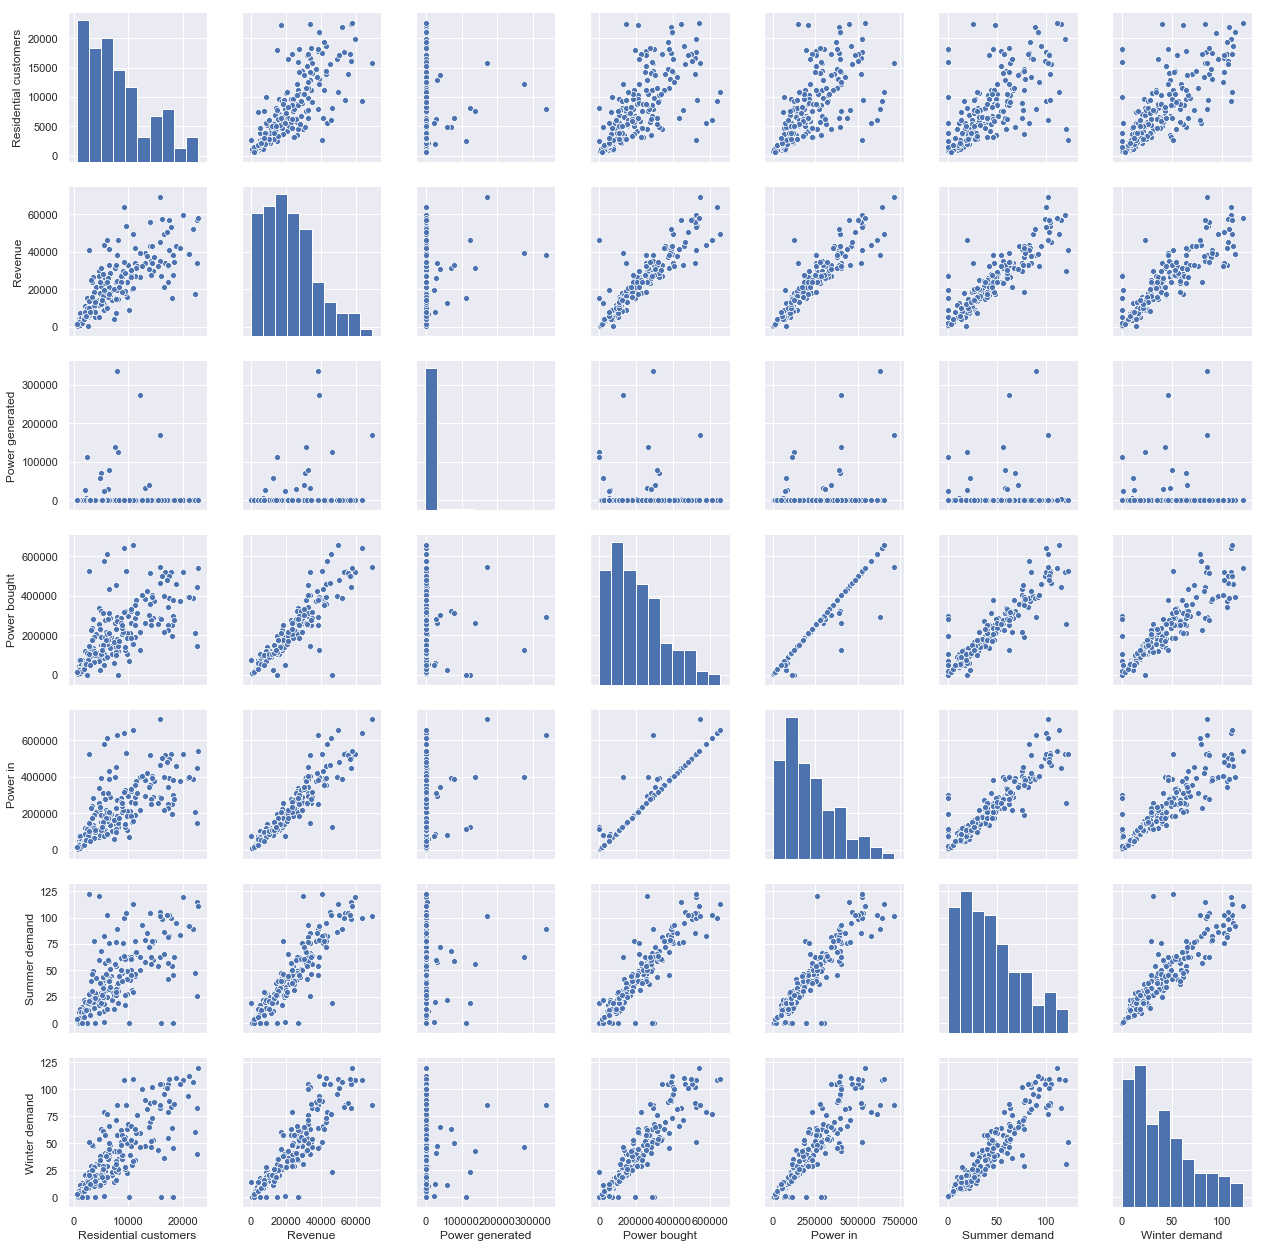

In [251]:
sns.pairplot(pd.read_csv('electricity2017_sample.csv'))

In [39]:
pd.isna(electricity.values).any(axis=1)

array([False, False, False, ...,  True,  True,  True])

In [21]:
electricity.sort_values('Power generated', ascending=False).head()

Name State            Type  \
128   Bonneville Power Administration    OR         Federal   
423        Duke Energy Carolinas, LLC    NC  Investor Owned   
1640     Virginia Electric & Power Co    VA  Investor Owned   
568                  Georgia Power Co    GA  Investor Owned   
213       Duke Energy Progress - (NC)    NC  Investor Owned   

      Residential customers  Industrial customers  Commercial customers  \
128                       0                     4                     8   
423                 2181646                  6240                369230   
1640                2298895                   648                275136   
568                 2173557                 10627                317288   
213                 1320174                  4103                234472   

        Revenue  Power generated  Power bought    Power in  Summer demand  \
128   3586524.4       89094156.0     4314511.0  93408667.0         8226.0   
423   7315231.0       81700915.0    10227547.0  91928462.0        17422.0   
1640  7416613.7       74067743.0    12077869.0  86145612.0        16350.0   
568   8311965.6       63184996.0    27252467.0  90437463.0        16002.0   
213   5125684.5       61393565.0     7752601.0  69146166.0        12590.0   

      Winter demand  
128         10943.0  
423         16743.0  
1640        16618.0  
568         13894.0  
213         14407.0

In [27]:
electricity[electricity.State == 'CA'].sort_values('Power in')

Name State  \
2100  Pico Rivera Innovative Municipal Energy    CA   
2096                        Griddy Energy LLC    CA   
2082                  Port of Stockton - (CA)    CA   
2102                          Longroad Energy    CA   
1939                  Pittsburg Power Company    CA   
2027                    Ahana Renewables, LLC    CA   
52                     Anza Electric Coop Inc    CA   
1968                  City of Cerritos - (CA)    CA   
649                 City of Healdsburg - (CA)    CA   
2089                          Port of Oakland    CA   
1873               City of Victorville - (CA)    CA   
2009                            SunEdison LLC    CA   
1598                     City of Ukiah - (CA)    CA   
863                     City of Lompoc - (CA)    CA   
825         Lassen Municipal Utility District    CA   
1446             Bear Valley Electric Service    CA   
1506          Surprise Valley Electrification    CA   
355                     City of Corona - (CA)    CA   
1259            Plumas-Sierra Rural Elec Coop    CA   
1585                     Truckee Donner P U D    CA   
2066                           Spruce Finance    CA   
2090               Apple Valley Choice Energy    CA   
1481               City of Shasta Lake - (CA)    CA   
1865             City of Moreno Valley - (CA)    CA   
2068   The Regents of the Univ. of California    CA   
77                              City of Azusa    CA   
15                            City of Alameda    CA   
88                     City of Banning - (CA)    CA   
316                     City of Colton - (CA)    CA   
2093           Redwood Coast Energy Authority    CA   
...                                       ...   ...   
782             Kings River Conservation Dist    CA   
1187                 City of Palo Alto - (CA)    CA   
945                Merced Irrigation District    CA   
1631                           City of Vernon    CA   
1295                   City of Redding - (CA)    CA   
1196                  City of Pasadena - (CA)    CA   
328                     Commerce Energy, Inc.    CA   
579                   City of Glendale - (CA)    CA   
1228                    Pilot Power Group Inc    CA   
2091    Silicon Valley Clean Energy Authority    CA   
1357           City & County of San Francisco    CA   
182           City of Burbank Water and Power    CA   
1330                 City of Roseville - (CA)    CA   
1311                 City of Riverside - (CA)    CA   
2006             Sonoma Clean Power Authority    CA   
2080         Peninsula Clean Energy Authority    CA   
1918                    SolarCity Corporation    CA   
1899                       Marin Clean Energy    CA   
45                     City of Anaheim - (CA)    CA   
988               Modesto Irrigation District    CA   
1589              Turlock Irrigation District    CA   
705              Imperial Irrigation District    CA   
1835           Northern California Power Agny    CA   
1366               City of Santa Clara - (CA)    CA   
1344           Sacramento Municipal Util Dist    CA   
869   Los Angeles Department of Water & Power    CA   
1355              San Diego Gas & Electric Co    CA   
1376            Calpine Energy Solutions, LLC    CA   
1180               Pacific Gas & Electric Co.    CA   
1445            Southern California Edison Co    CA   

                             Type  Residential customers  \
2100  Community Choice Aggregator                  14179   
2096        Retail Power Marketer                   1333   
2082                    Municipal                      0   
2102             Behind the Meter                      0   
1939                    Municipal                    348   
2027             Behind the Meter                      0   
52                    Cooperative                   4338   
1968                    Municipal                      0   
649                     Municipal                   4823   
2089                    Munici

In [28]:
68895125

68895125

In [33]:
e = electricity.sort_values('Power in', ascending=False)
#e = e[(e['Power in'] < 2e7) & (e['Power in'] > 1e5)]
e = e[(e['Power in'] > 1e6)]
e.shape

(427, 12)

(array([2.067e+03, 3.300e+01, 5.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 2.58165336e+07, 5.16330672e+07, 7.74496008e+07,
        1.03266134e+08, 1.29082668e+08, 1.54899202e+08, 1.80715735e+08,
        2.06532269e+08, 2.32348802e+08, 2.58165336e+08]),
 <a list of 10 Patch objects>)

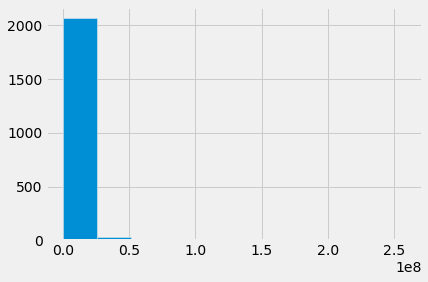

In [14]:
plt.figure(); plt.hist(electricity['Power in'])

In [9]:
import seaborn as sns

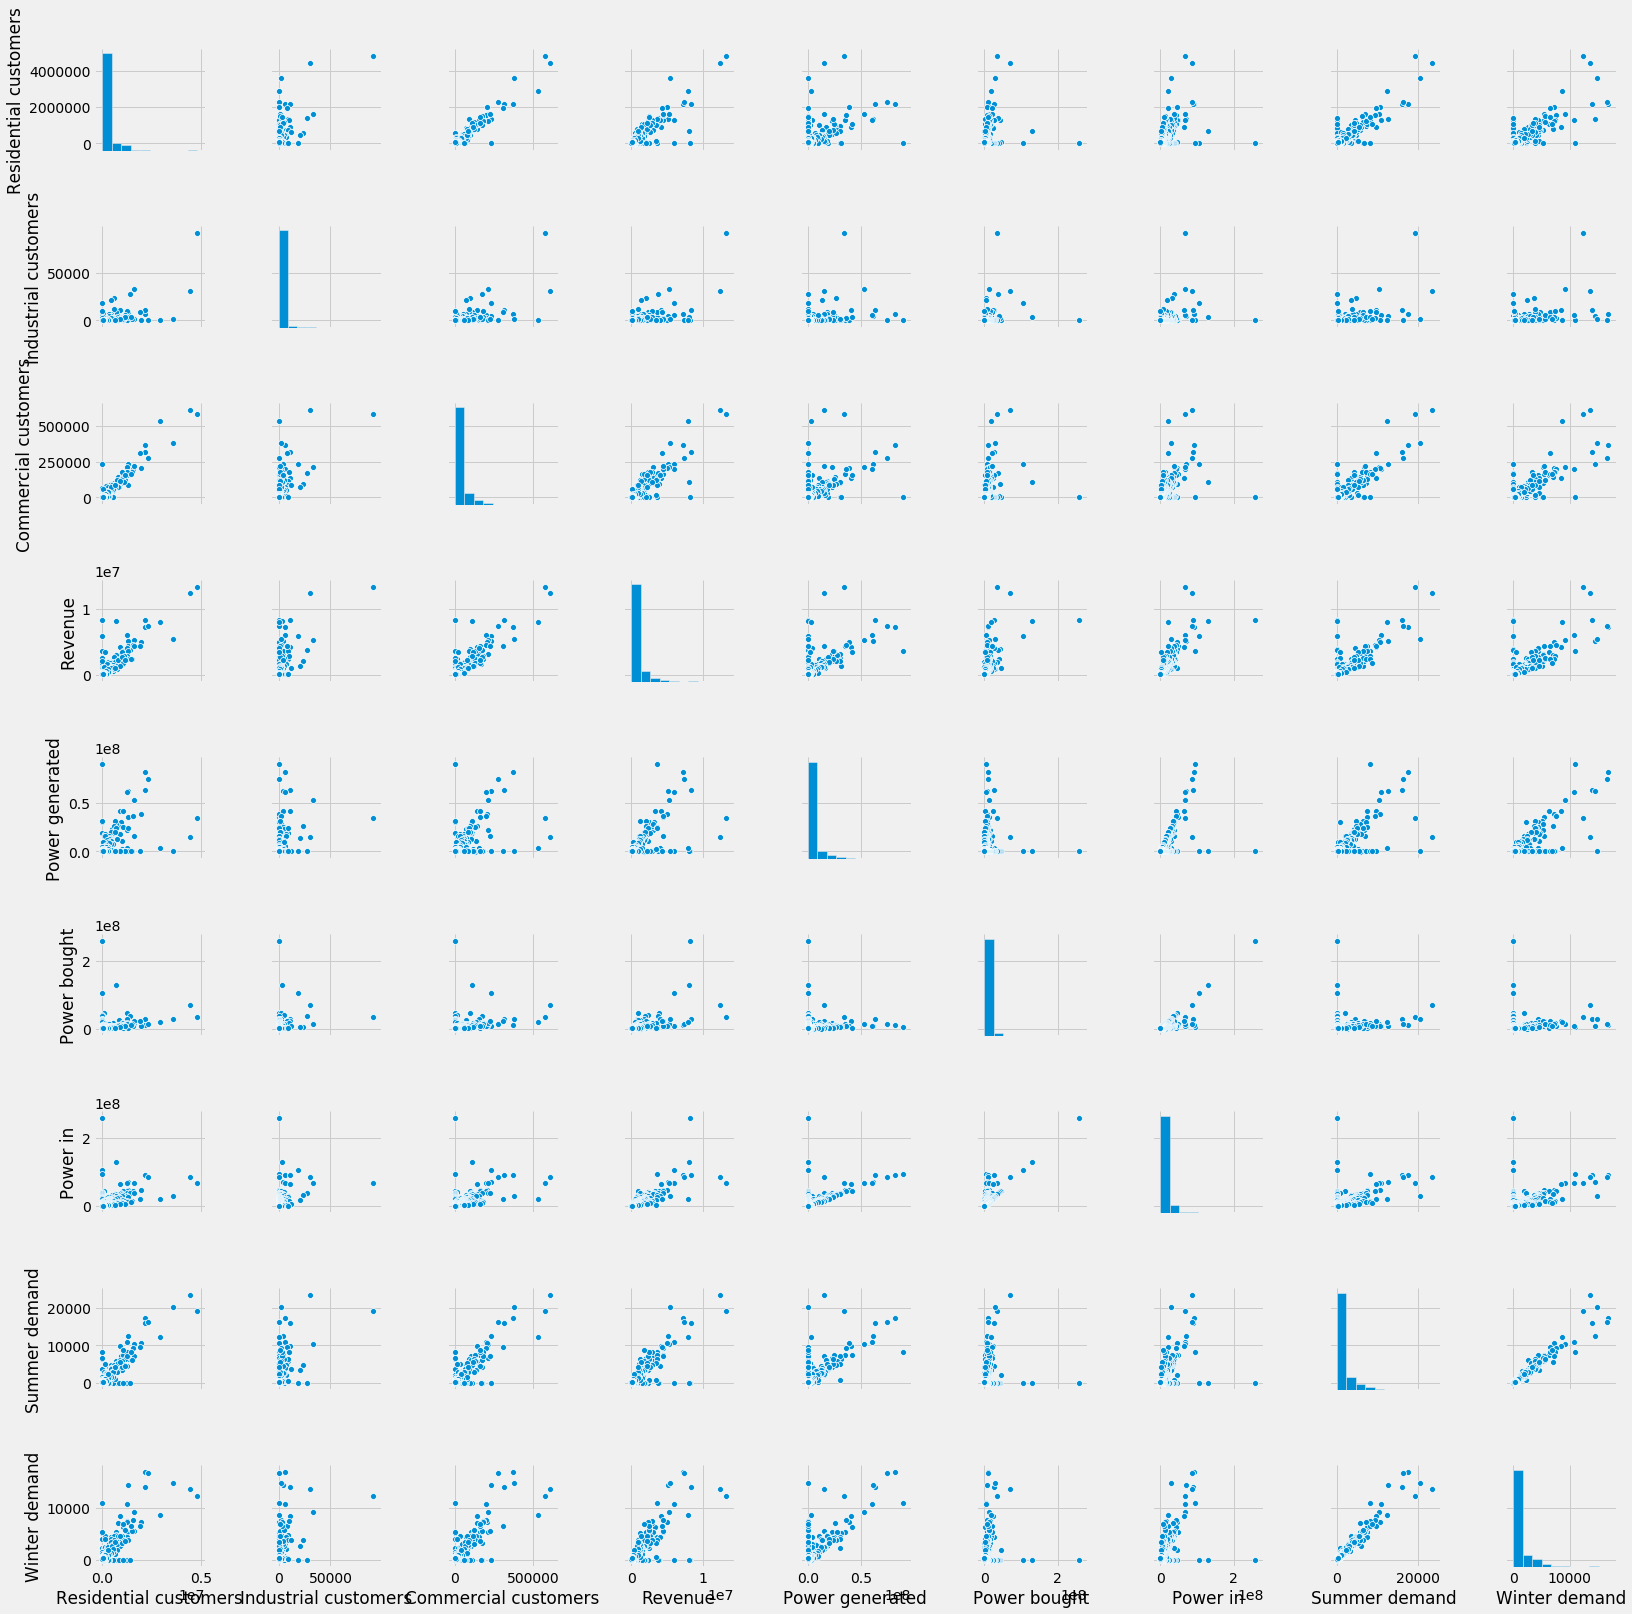

In [34]:
#sns.pairplot(e.sample(200, replace=False))
sns.pairplot(e)

In [35]:
e[e.State == 'CA'].sort_values('Power in')

Name State  \
945                Merced Irrigation District    CA   
1631                           City of Vernon    CA   
1295                   City of Redding - (CA)    CA   
1196                  City of Pasadena - (CA)    CA   
328                     Commerce Energy, Inc.    CA   
579                   City of Glendale - (CA)    CA   
1228                    Pilot Power Group Inc    CA   
2091    Silicon Valley Clean Energy Authority    CA   
1357           City & County of San Francisco    CA   
182           City of Burbank Water and Power    CA   
1330                 City of Roseville - (CA)    CA   
1311                 City of Riverside - (CA)    CA   
2006             Sonoma Clean Power Authority    CA   
2080         Peninsula Clean Energy Authority    CA   
1918                    SolarCity Corporation    CA   
1899                       Marin Clean Energy    CA   
45                     City of Anaheim - (CA)    CA   
988               Modesto Irrigation District    CA   
1589              Turlock Irrigation District    CA   
705              Imperial Irrigation District    CA   
1835           Northern California Power Agny    CA   
1366               City of Santa Clara - (CA)    CA   
1344           Sacramento Municipal Util Dist    CA   
869   Los Angeles Department of Water & Power    CA   
1355              San Diego Gas & Electric Co    CA   
1376            Calpine Energy Solutions, LLC    CA   
1180               Pacific Gas & Electric Co.    CA   
1445            Southern California Edison Co    CA   

                             Type  Residential customers  \
945         Political Subdivision                   7418   
1631                    Municipal                     73   
1295                    Municipal                  37878   
1196                    Municipal                  55763   
328         Retail Power Marketer                 116433   
579                     Municipal                  74783   
1228        Retail Power Marketer                      0   
2091  Community Choice Aggregator                 148076   
1357                    Municipal                    238   
182                     Municipal                  46215   
1330                    Municipal                  52181   
1311                    Municipal                  97347   
2006  Community Choice Aggregator                 183547   
2080  Community Choice Aggregator                 192797   
1918             Behind the Meter                 290223   
1899  Community Choice Aggregator                 231733   
45                      Municipal                 111347   
988         Political Subdivision                  97935   
1589        Political Subdivision                  73393   
705         Political Subdivision                 132632   
1835        Political Subdivision                      0   
1366                    Municipal                  46859   
1344        Political Subdivision                 552678   
869                     Municipal                1329968   
1355               Investor Owned                1281721   
1376        Retail Power Marketer                      0   
1180               Investor Owned                4808754   
1445               Investor Owned                4433753   

      Industrial customers  Commercial customers     Revenue  Power generated  \
945                     93                  1423     76537.5         511926.0   
1631                   534                  1303    161302.5           2265.0   
1295                   333                  5834    157269.6         382918.0   
1196                     0                  8485    200476.0          76375.0   
328                      0                  5660    110979.2              0.0   
579                     24                 13175    223088.7         145166.0   
1228                    49                   960     70711.0              0.0   
2091                   567                 24351    1346

# Food access

In [241]:
f = pd.read_csv('food_access.csv')
f.head()

County  Population State  Housing Data.Residing in Group Quarters  \
0  Abbeville       25417    SC                                    901.0   
1     Acadia       61773    LA                                   1050.0   
2   Accomack       33164    VA                                    428.0   
3        Ada      392365    ID                                   9714.0   
4      Adair        7682    IA                                    151.0   

   Housing Data.Rural Housing Percentage  Housing Data.Total Housing Units  \
0                               0.833333                              9990   
1                               0.500000                             22841   
2                               1.000000                             13798   
3                               0.067797                            148445   
4                               1.000000                              3292   

   Housing Data.Urban Housing Percentage  Vehicle Access.1 Mile  \
0                               0.166667             604.389670   
1                               0.500000             410.456890   
2                               0.000000            1063.331475   
3                               0.932203             861.331554   
4                               0.000000              61.769708   

   Vehicle Access.1/2 Mile  Vehicle Access.10 Miles  \
0               708.347213               167.470885   
1               904.408028                15.408274   
2              1195.633269               225.504004   
3              3291.339993                 2.431202   
4                74.378219                 2.650825   

                                ...                                \
0                               ...                                 
1                               ...                                 
2                               ...                                 
3                               ...                                 
4                               ...                                 

   Low Access Numbers.People.10 Miles  Low Access Numbers.People.20 Miles  \
0                         5176.769348                            0.000000   
1                          625.970960                            0.000000   
2                          727.000007                            0.000000   
3                          209.471626                            1.931907   
4                          605.066287                            0.000000   

   Low Access Numbers.Seniors.1 Mile  Low Access Numbers.Seniors.1/2 Mile  \
0                        3409.212342                          3960.807731   
1                        3643.694593                          5299.224741   
2                        4888.553101                          5621.920635   
3                       12499.892737                         30282.707812   
4                         972.160233                          1132.093310   

   Low Access Numbers.Seniors.10 Miles  Low Access Numbers.Seniors.20 Miles  \
0                           984.860435                                  0.0   
1                            72.962499                                  0.0   
2                           156.000001                                  0.0   
3                            22.883350                                  0.0   
4                           118.862399                                  0.0   

   Low Access Percents.Low Access Only.1 and 20 Miles  \
0                                           0.166667    
1                                           0.250000    
2                                           0.000000    
3                                           0.508475    
4                                           0.000000    

   Low Access Percents.Low Access Only.1/2 and 10 Miles  \
0                                           0.500000      
1                                           0.500000      
2               

In [242]:
h = pd.read_csv('housing_raw.csv')
h = h[~h['Geographic Area Name'].str.contains('Puerto Rico')]

In [243]:
food_access = pd.DataFrame({
    'county': f.County,
    'population': f.Population,
    'state': f.State,
    'housing_units': f['Housing Data.Total Housing Units'].astype(np.int),
    'urban_pct': f['Housing Data.Urban Housing Percentage'] * 100,
    'low_access_1': f['Low Access Numbers.People.1 Mile'].astype(np.int),
    'low_access_10': f['Low Access Numbers.People.10 Miles'].astype(np.int),
    'low_access_20': f['Low Access Numbers.People.20 Miles'].astype(np.int),

})
#food_access.to_csv('food_access_2010_2015.csv', index=False)

In [244]:
food_access['low_20_pct'] = food_access['low_access_20'] / food_access.population
food_access['low_1_pct'] = food_access['low_access_1'] / food_access.population

In [245]:
states = pd.read_csv('states.csv')
states.head()


State State Code Region            Division
0      Alaska         AK   West             Pacific
1     Alabama         AL  South  East South Central
2    Arkansas         AR  South  West South Central
3     Arizona         AZ   West            Mountain
4  California         CA   West             Pacific

In [246]:
h['Occupied housing units!!Estimate!!VEHICLES AVAILABLE!!No vehicle available'].max()

85.4

In [247]:
[c for c in list(h.columns) if 'vehicle' in c.lower()]

['Occupied housing units!!Estimate!!VEHICLES AVAILABLE!!No vehicle available',
 'Occupied housing units!!Margin of Error!!VEHICLES AVAILABLE!!No vehicle available',
 'Occupied housing units!!Estimate!!VEHICLES AVAILABLE!!1 vehicle available',
 'Occupied housing units!!Margin of Error!!VEHICLES AVAILABLE!!1 vehicle available',
 'Occupied housing units!!Estimate!!VEHICLES AVAILABLE!!2 vehicles available',
 'Occupied housing units!!Margin of Error!!VEHICLES AVAILABLE!!2 vehicles available',
 'Occupied housing units!!Estimate!!VEHICLES AVAILABLE!!3 or more vehicles available',
 'Occupied housing units!!Margin of Error!!VEHICLES AVAILABLE!!3 or more vehicles available',
 'Owner-occupied housing units!!Estimate!!VEHICLES AVAILABLE!!No vehicle available',
 'Owner-occupied housing units!!Margin of Error!!VEHICLES AVAILABLE!!No vehicle available',
 'Owner-occupied housing units!!Estimate!!VEHICLES AVAILABLE!!1 vehicle available',
 'Owner-occupied housing units!!Margin of Error!!VEHICLES AVAILAB

In [248]:
def make_county(geo_area):
    if geo_area == 'District of Columbia, District of Columbia':
        return 'District of Columbia'
    if geo_area == 'Carson City, Nevada':
        return 'Carson City'
    
    for p in ('County', 'city', 'Parish', 'Census Area', 'Municipality', 'City and Borough', 'Borough'):
#    for p in (' County, ', ' City, '):
        cty = geo_area.rsplit(f' {p}, ', 1)
        if len(cty) > 1:
            break
    else:
        raise ValueError(geo_area)
    return cty[0]

car_ownership = pd.DataFrame({
    'geo': h['Geographic Area Name'],
    'county': h['Geographic Area Name'].apply(make_county),
    'state': h['Geographic Area Name'].apply(lambda x: x.rsplit(', ', 1)[-1]),
    'carless': h['Occupied housing units!!Estimate!!VEHICLES AVAILABLE!!No vehicle available'],
})
car_ownership = pd.merge(car_ownership, states, left_on='state', right_on='State')
car_ownership['state'] = car_ownership['State Code']
car_ownership = car_ownership.drop(['State', 'State Code'], axis=1)
car_ownership.head()

geo        county state  carless Region  \
0        Lonoke County, Arkansas        Lonoke    AR      4.8  South   
1  Little River County, Arkansas  Little River    AR      6.3  South   
2      Woodruff County, Arkansas      Woodruff    AR     14.4  South   
3         Perry County, Arkansas         Perry    AR      4.7  South   
4      Ouachita County, Arkansas      Ouachita    AR      9.4  South   

             Division  
0  West South Central  
1  West South Central  
2  West South Central  
3  West South Central  
4  West South Central

In [249]:
food_access.shape

(3143, 10)

In [250]:
food_access[food_access.county.str.contains('cadia')]

county  population state  housing_units  urban_pct  low_access_1  \
1  Acadia       61773    LA          22841       50.0         32874   

   low_access_10  low_access_20  low_20_pct  low_1_pct  
1            625              0         0.0   0.532174

In [252]:
combined.shape

(3137, 8)

In [256]:
def make_countystate(df):
    df['countystate'] = df.county + df.state
    return df
combined = pd.merge(make_countystate(food_access), make_countystate(car_ownership), on='countystate')
combined['county'] = combined.county_x
combined['state'] = combined.state_x
combined = combined.drop(['county_x', 'county_y', 'state_x', 'state_y', 'countystate', 'Region', 'Division'], axis=1)
combined = pd.DataFrame(dict(
    county=combined.county,
    state=combined.state,
    population=combined.population,
    housing_units=combined.housing_units,
    urban_pct=combined.urban_pct,
    low_access_1=combined.low_access_1,
    low_access_10=combined.low_access_10,
    low_access_20=combined.low_access_20,
    carless_pct=combined.carless,
))
combined.to_csv('food_access_2010_2015.csv', index=False)
#combined['low_access_10_pct'] = combined['low_access_10'] / combined['population']
#combined.to_csv('food_access_pt2.csv', index=False)

In [259]:
combined_pcts = combined.copy()
combined_pcts['low1pct'] = combined_pcts['low_access_1']/ combined_pcts['population']
combined_pcts['low10pct'] = combined_pcts['low_access_10']/ combined_pcts['population']
combined_pcts['low20pct'] = combined_pcts['low_access_20']/ combined_pcts['population']

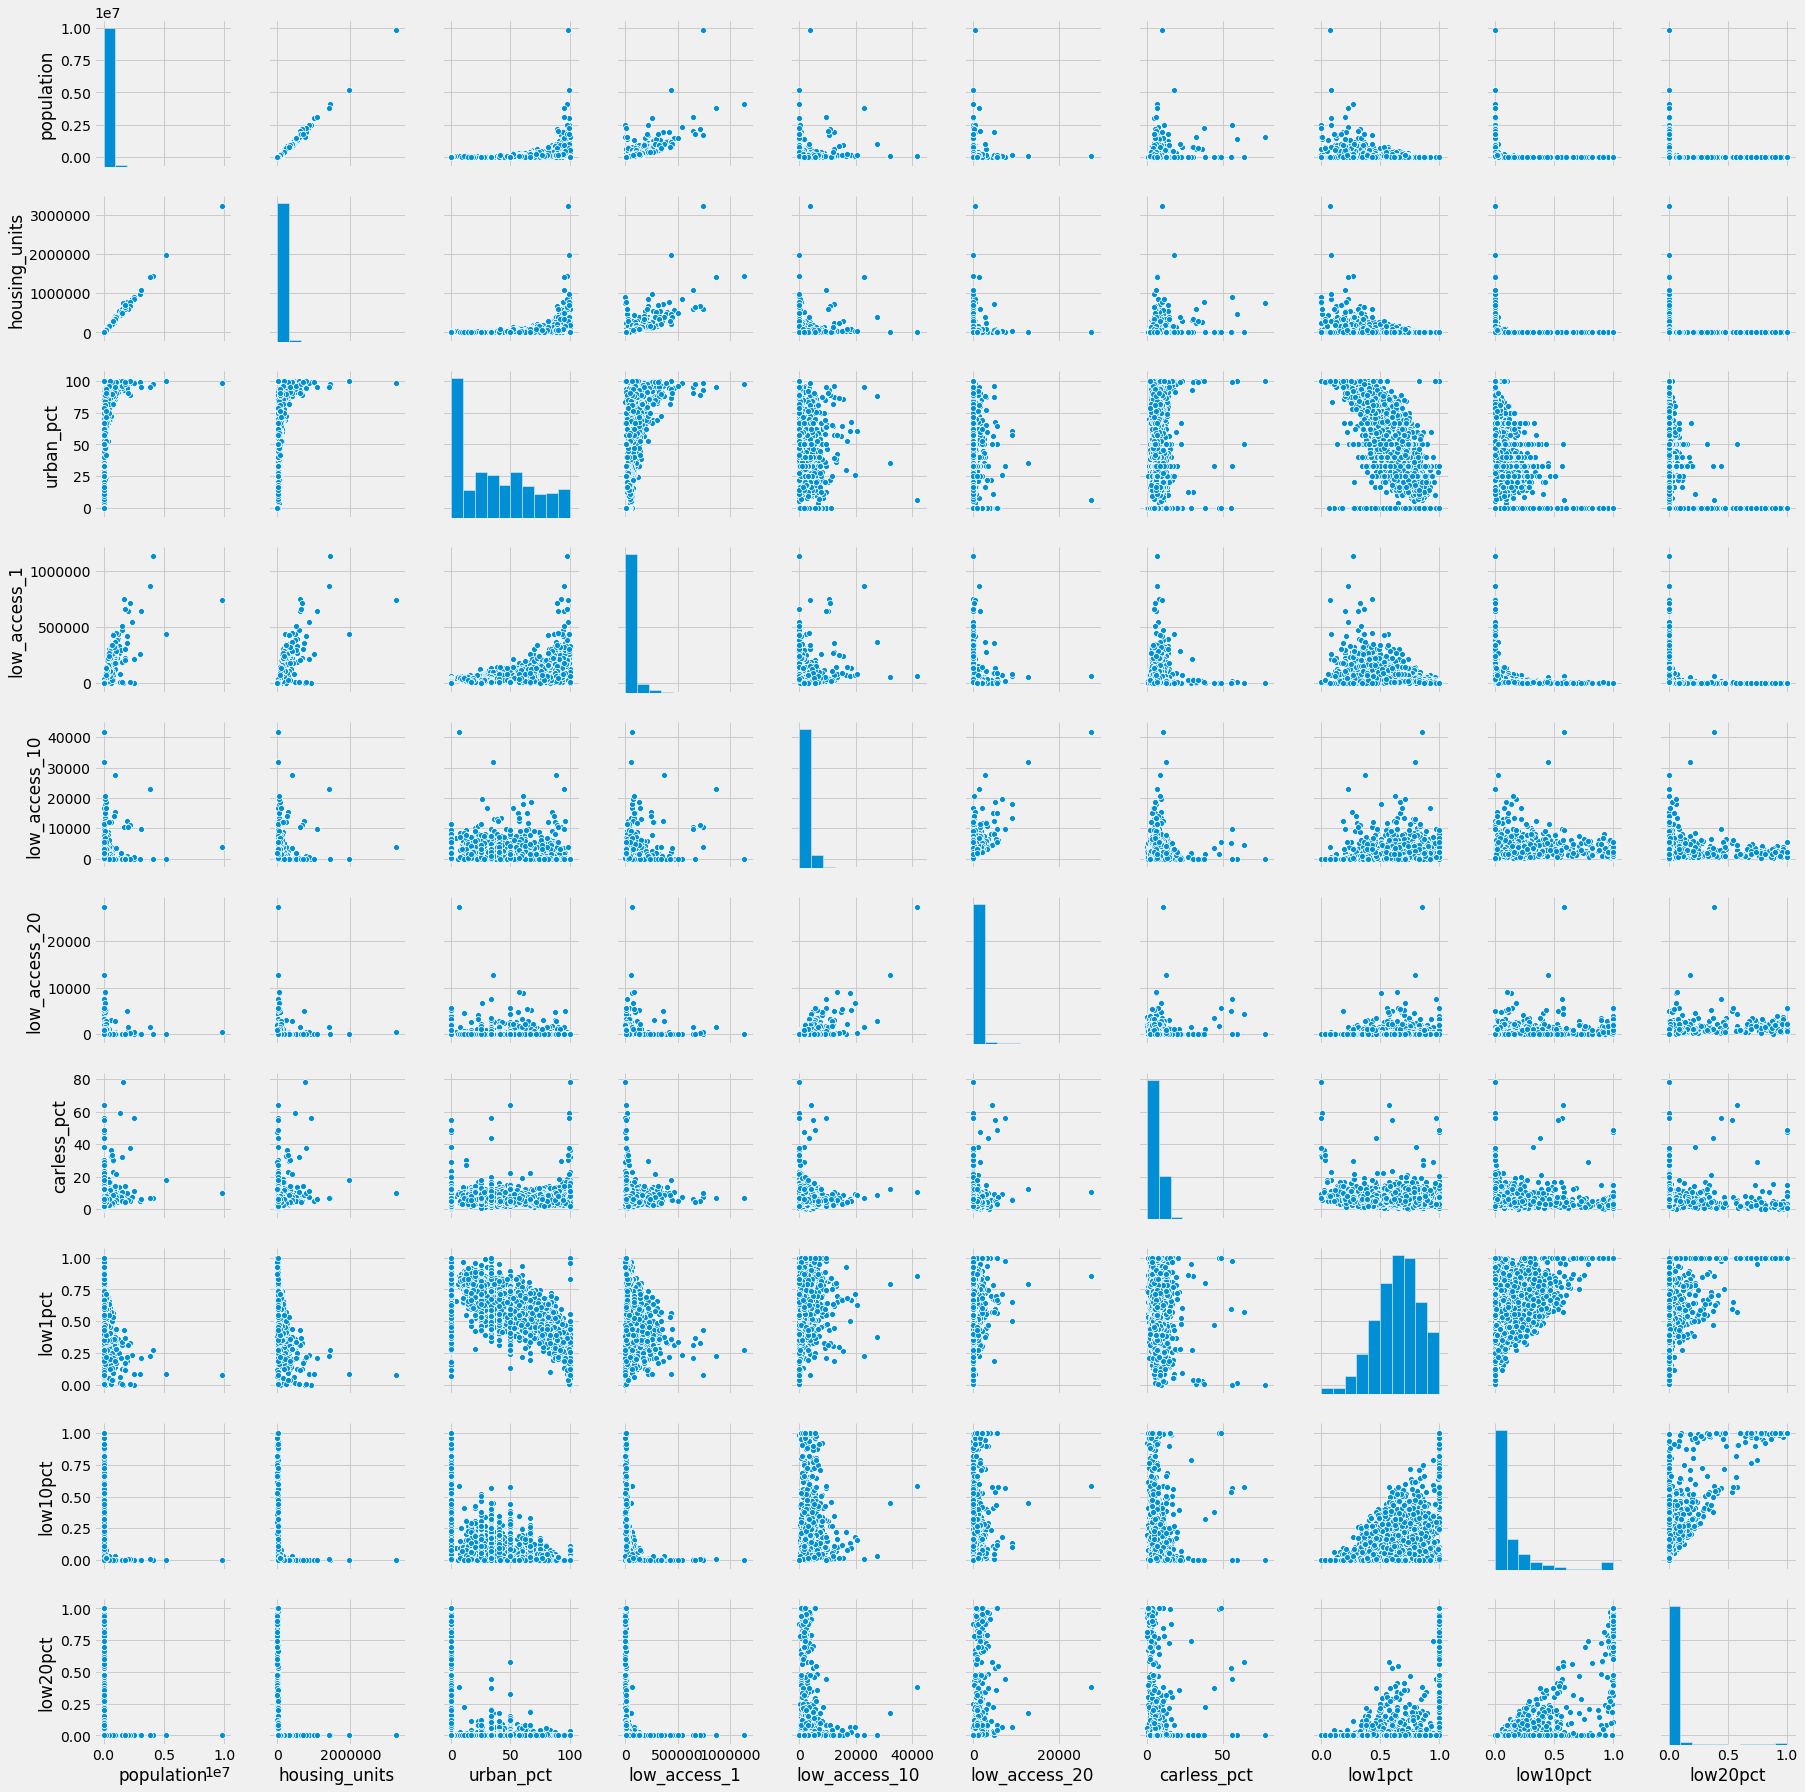

In [260]:
sns.pairplot(combined_pcts)

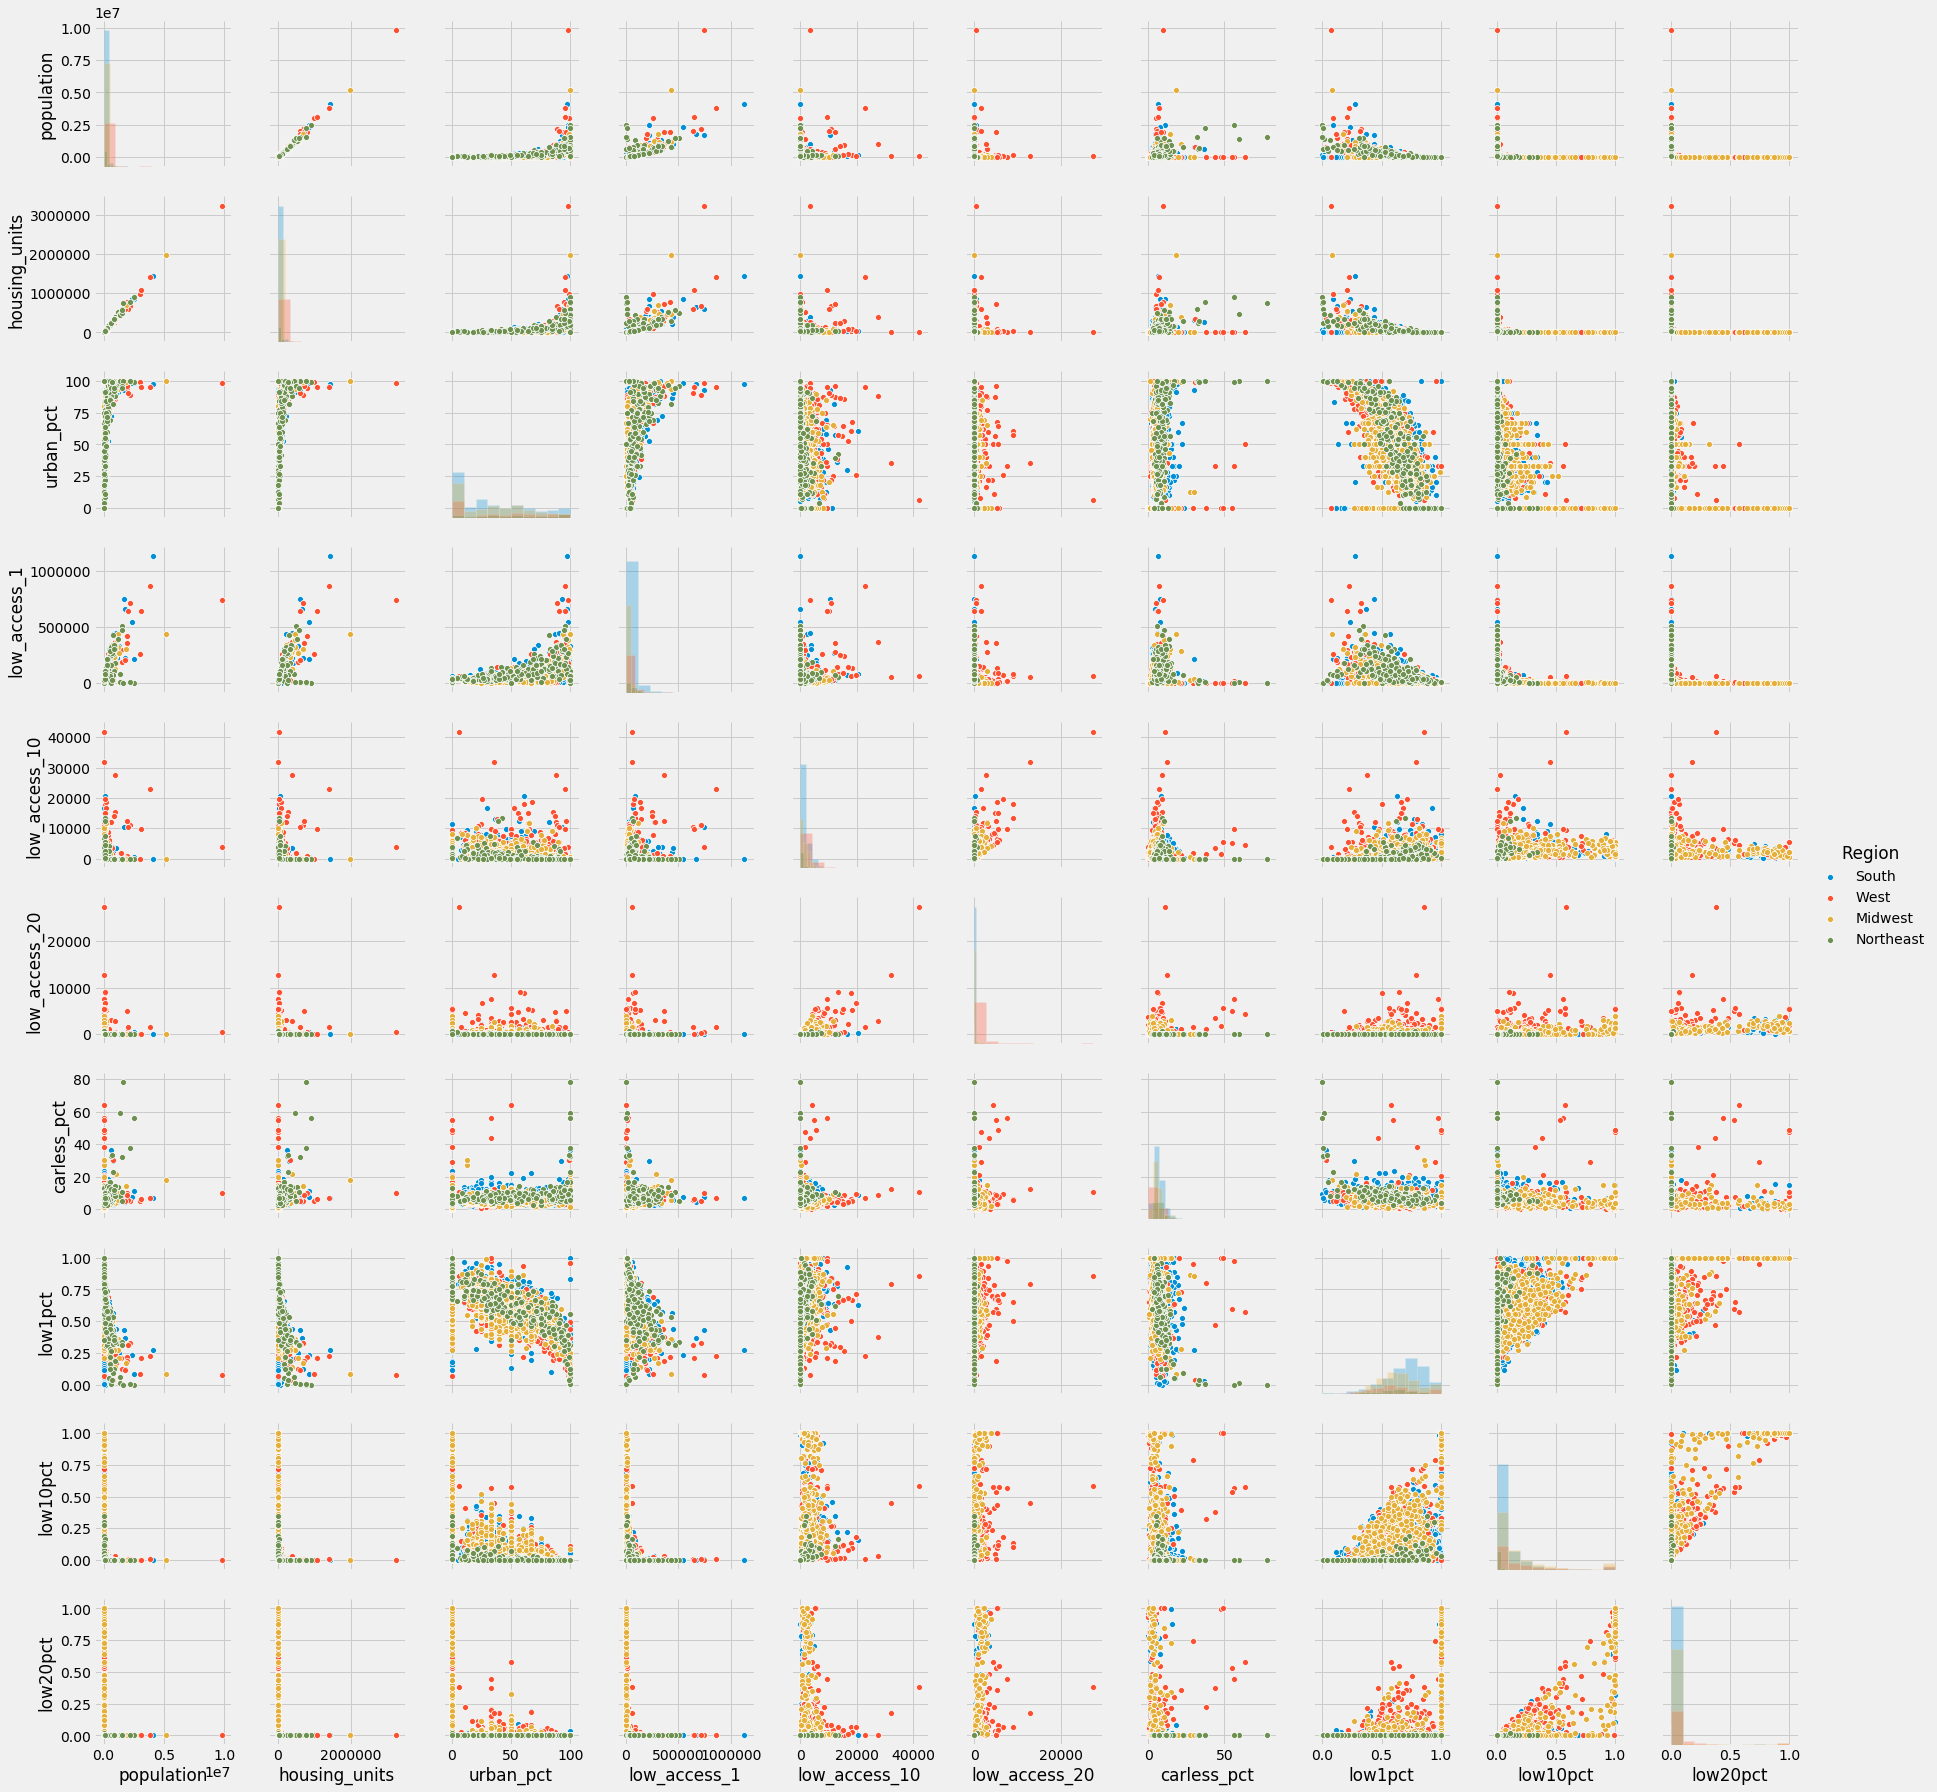

In [261]:
with_region = pd.merge(combined_pcts, states, left_on='state', right_on='State Code')
sns.pairplot(with_region, hue='Region', diag_kind='hist', diag_kws={'alpha': .3})

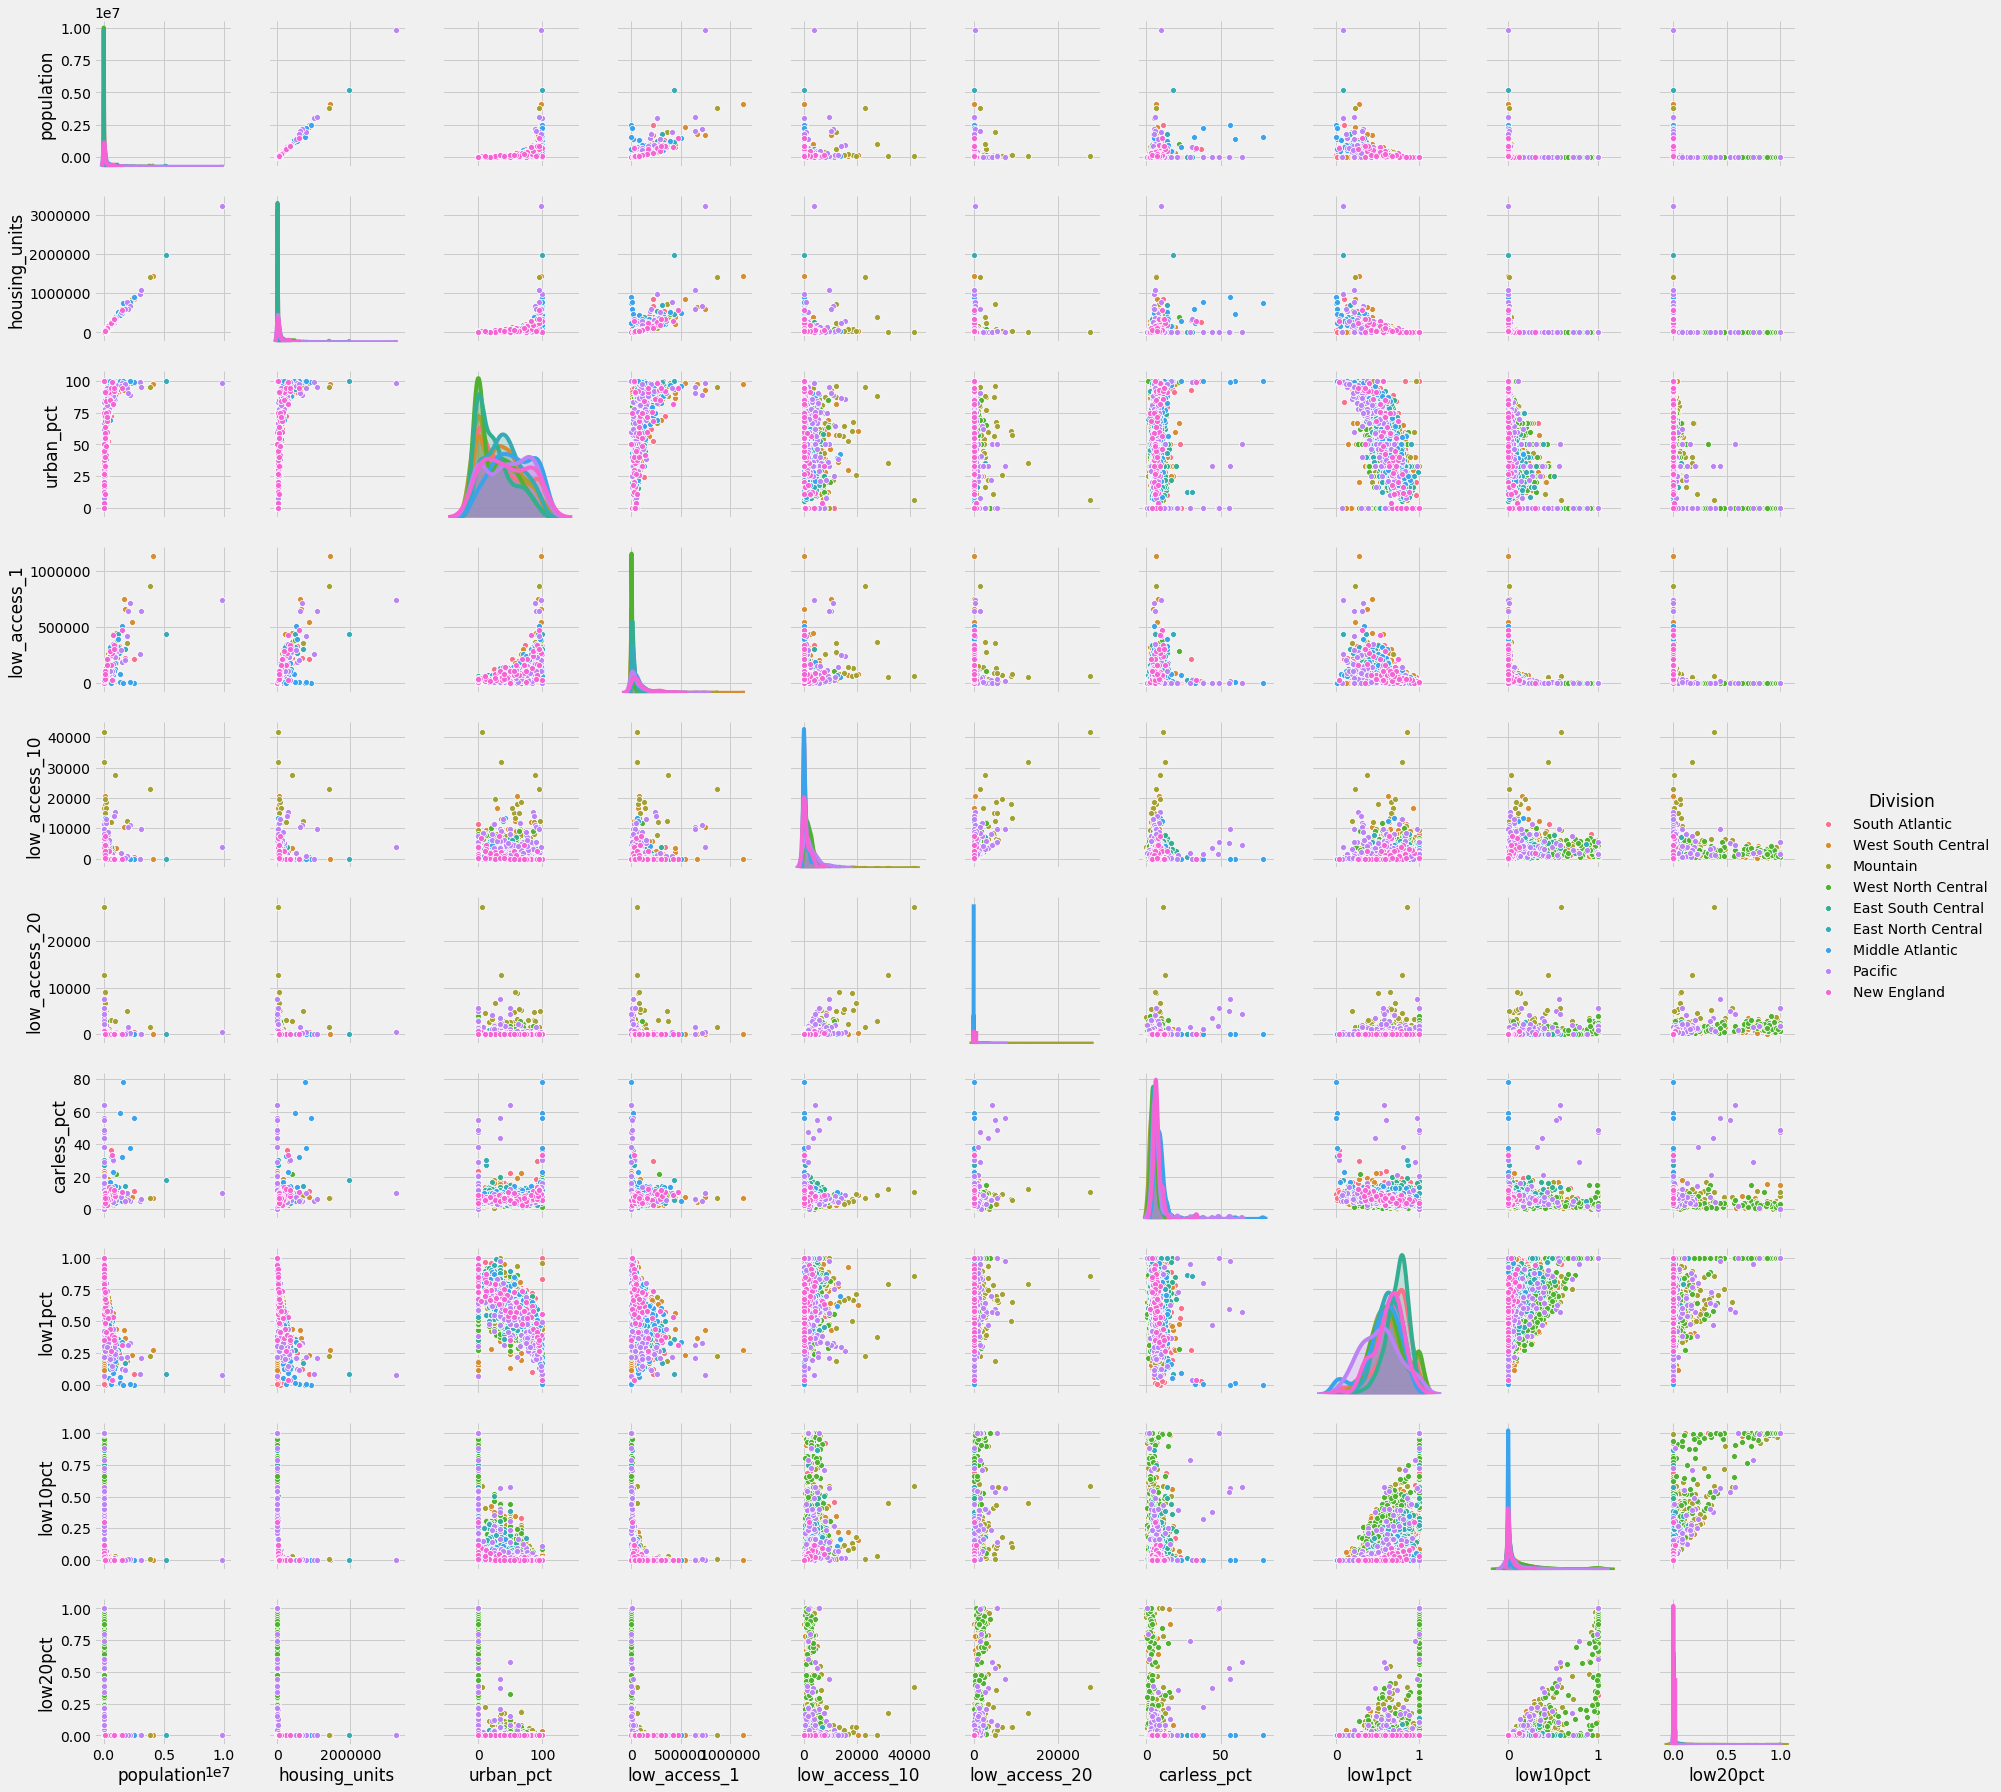

In [262]:
sns.pairplot(with_region, hue='Division')

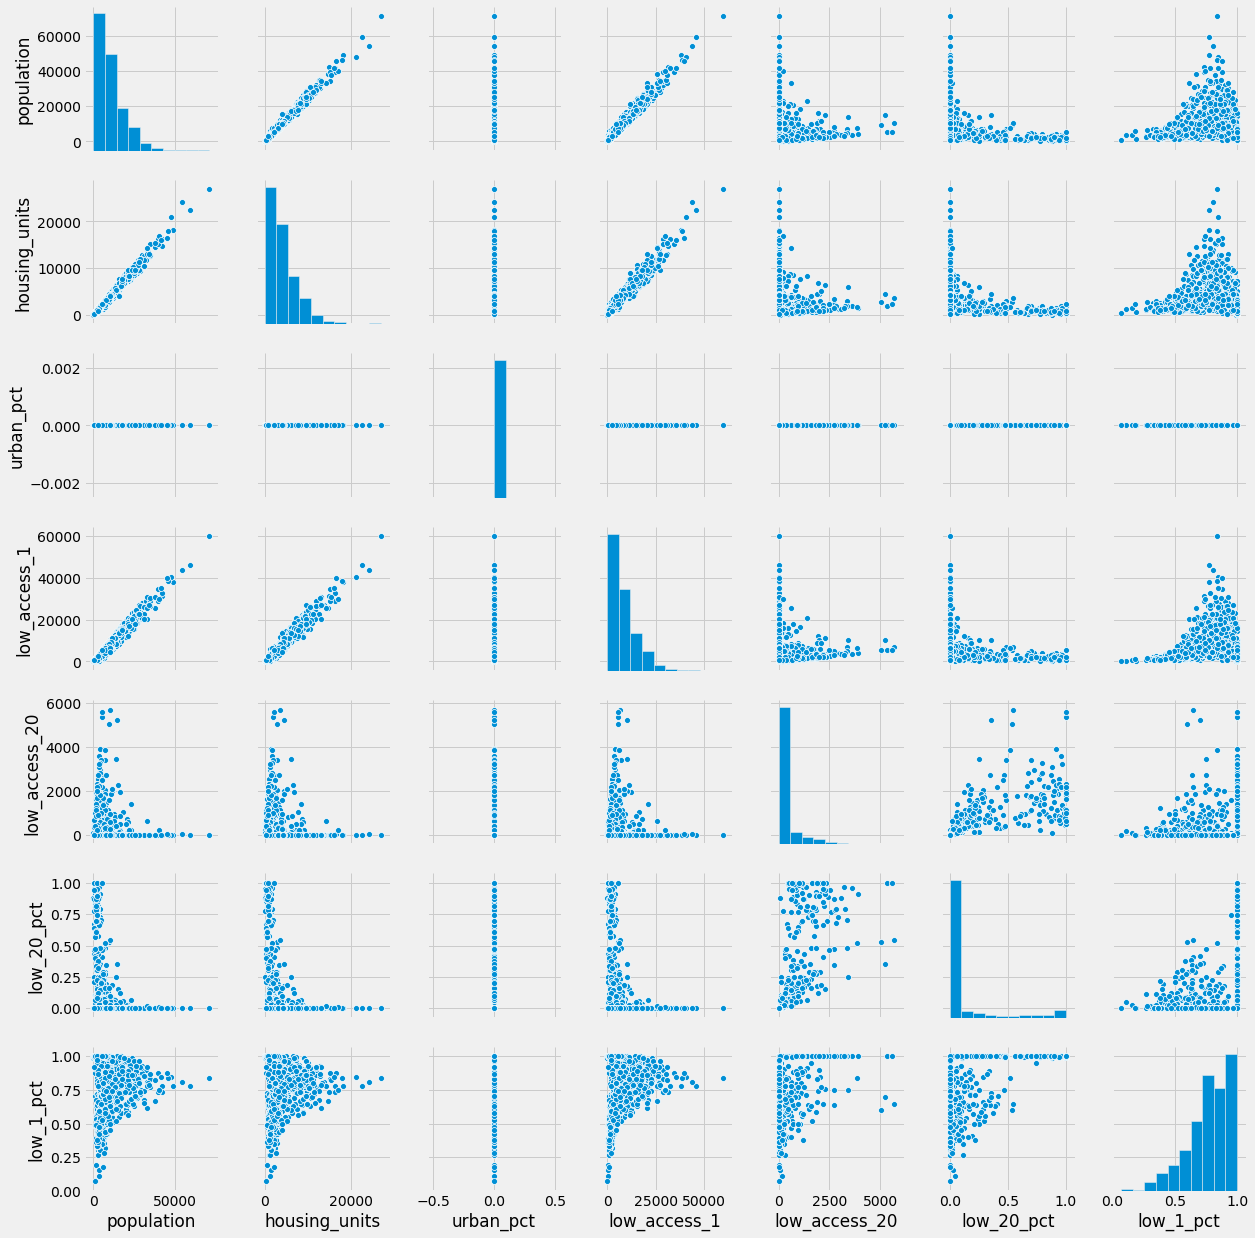

In [73]:
non_urban = food_access[food_access.urban_pct < .01]
sns.pairplot(non_urban)

/Users/rameshvs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


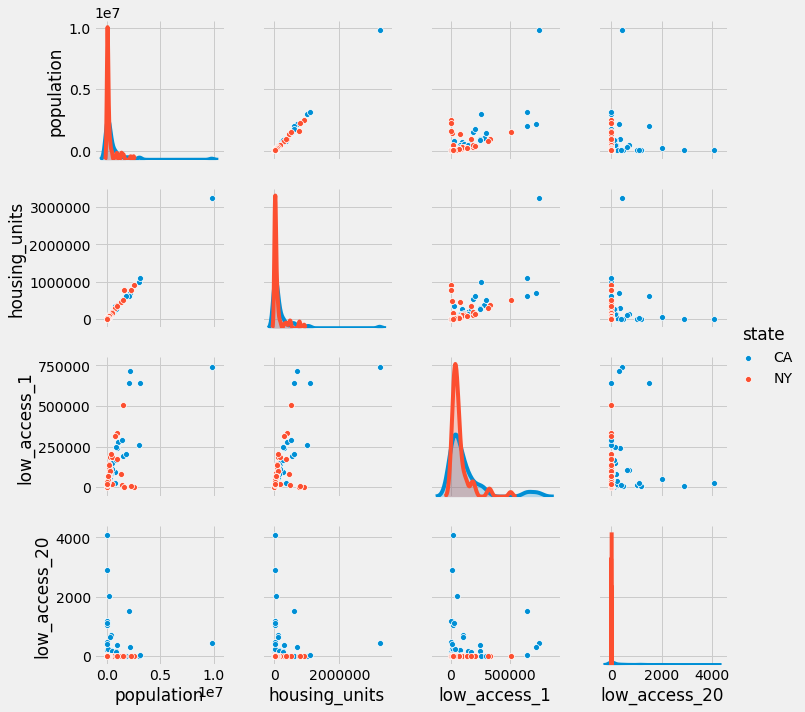

In [46]:
ca_ny = food_access[(food_access.state == 'NY') | (food_access.state == 'CA')]
sns.pairplot(ca_ny, hue='state')

In [48]:
f.sum(0)

County                                                            AbbevilleAcadiaAccomackAdaAdairAdairAdairAdair...
Population                                                                                                308745538
State                                                             SCLAVAIDIAKYMOOKCOIAIDILINMSNDNEOHPAWAWIVTSCMN...
Housing Data.Residing in Group Quarters                                                                 7.98732e+06
Housing Data.Rural Housing Percentage                                                                       2047.93
Housing Data.Total Housing Units                                                                          116716292
Housing Data.Urban Housing Percentage                                                                       1095.07
Vehicle Access.1 Mile                                                                                   2.07685e+06
Vehicle Access.1/2 Mile                                                 

# The Office

In [118]:
office = pd.read_csv('officeraw.csv')
office.head()

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker  deleted  
0  All right Jim. Your quarterlies look very good...  Michael    False  
1         Oh, I told you. I couldn't close it. So...      Jim    False  
2  So you've come to the master for guidance? Is ...  Michael    False  
3         Actually, you called me in here, but yeah.      Jim    False  
4    All right. Well, let me show you how it's done.  Michael    False

In [119]:
# Count number of words per character per episode (removing deleted lines)
office['num_words'] = office.line_text.apply(lambda x: len(x.split()))
office = office[np.logical_not(office.deleted)]
episode_level = office.groupby(['season', 'episode', 'speaker']).sum().reset_index()

In [124]:
episode_level.groupby('season').max().episode

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

In [120]:
# Compute overall episode number in the entire show
episodes_per_season = np.cumsum(episode_level.groupby('season').max().episode)
episodes_per_season.loc[0] = 0
episodes_per_season = episodes_per_season.sort_index()
episodes_before = pd.DataFrame(
    {'episodes_before': episodes_per_season.values}, 
    index=episodes_per_season.index + 1
)
episodes_before

episodes_before
season                 
1                     0
2                     6
3                    28
4                    51
5                    65
6                    91
7                   115
8                   139
9                   163
10                  186

season  episode  num_words
0         1        1       2861
1         1        2       3103
2         1        3       2842
3         1        4       3265
4         1        5       2789
5         1        6       3184
6         2        1       3357
7         2        2       3179
8         2        3       2795
9         2        4       2915
10        2        5       2966
11        2        6       2916
12        2        7       2797
13        2        8       3547
14        2        9       2953
15        2       10       3295
16        2       11       2863
17        2       12       3109
18        2       13       2661
19        2       14       3093
20        2       15       3119
21        2       16       2928
22        2       17       2839
23        2       18       3008
24        2       19       2589
25        2       20       2910
26        2       21       3246
27        2       22       3539
28        3        1       2519
29        3        2       3025
..      ...      ...        ...
156       8       18       3463
157       8       19       2960
158       8       20       3265
159       8       21       3278
160       8       22       3079
161       8       23       3061
162       8       24       2774
163       9        1       2778
164       9        2       3358
165       9        3       2831
166       9        4       3060
167       9        5       2980
168       9        6       3362
169       9        7       3200
170       9        8       2988
171       9        9       3197
172       9       10       3217
173       9       11       3408
174       9       12       3127
175       9       13       3248
176       9       14       3385
177       9       15       3387
178       9       16       5539
179       9       17       2844
180       9       18       3149
181       9       19       3130
182       9       20       2871
183       9       21       4509
184       9       22       5354
185       9       23       6276

[186 rows x 3 columns]

In [175]:
# Total words per episode
total_episode_words = episode_level.groupby(['season', 'episode']).sum().sort_values('num_words', ascending=False)
words_per_ep = total_episode_words['num_words'].sort_index().reset_index()

# Keep only the main characters
total_character_words = episode_level.groupby('speaker').sum().sort_values('num_words', ascending=False)
character_word_counts = words_by_episode_and_character['num_words']
popular_characters = set(character_word_counts[character_word_counts > 1050].index)


data_for_exam = episode_level[episode_level.speaker.isin(popular_characters)]
data_for_exam = pd.merge(words_per_ep, data_for_exam, on=('season', 'episode'))
NUM_EPISODES = 40
#randomly_chosen_episodes = np.random.choice(range(1, 187), NUM_EPISODES, replace=False)

data_for_exam = pd.merge(data_for_exam, episodes_before, on='season')
data_for_exam['overall_episode'] = data_for_exam.episodes_before + data_for_exam.episode

data_for_exam = data_for_exam.loc[:, ['season', 'episode', 'overall_episode', 'speaker', 'num_words']]
data_for_exam.to_csv('the_office.csv', index=False)

In [176]:
data_for_exam.sample(100)

season  episode  overall_episode   speaker  num_words
2683       9       11              174    Darryl        NaN
1649       6       21              112     Oscar        NaN
1124       5       12               77     Oscar        NaN
480        3        7               35      Ryan        NaN
2865       9       22              185       Jim        NaN
547        3       11               39      Ryan        NaN
1985       7       17              132   Michael        NaN
773        4        3               54     Kevin        NaN
1770       7        4              119       Pam        NaN
1302       5       25               90   Michael        NaN
1475       6       10              101  Meredith        NaN
1038       5        6               71      Ryan        NaN
2163       8        3              142      Ryan        NaN
1492       6       11              102   Michael        NaN
1758       7        4              119    Darryl        NaN
963        5        2               67      Andy        NaN
1257       5       22               87       Pam        NaN
442        3        5               33     Kelly        NaN
1961       7       15              130   Stanley        NaN
2258       8        9              148     Oscar        NaN
2473       8       22              161  Meredith        NaN
1410       6        6               97     Kelly        NaN
1094       5       10               75   Michael        NaN
2635       9        8              171    Angela        NaN
923        4       13               64   Michael        NaN
620        3       17               45     David        NaN
21         1        2                2      Ryan        NaN
284        2       16               22       Roy        NaN
1334       6        1               92     Oscar        NaN
587        3       14               42       Roy        NaN
...      ...      ...              ...       ...        ...
1447       6        8               99       Pam        NaN
2215       8        6              145      Toby        NaN
714        3       22               50   Stanley        NaN
1087       5       10               75     Creed        NaN
334        2       20               26     Kevin        NaN
2089       7       23              138  Meredith        NaN
1696       6       24              115     Kelly        NaN
808        4        5               56   Michael        NaN
450        3        6               34      Andy        NaN
1613       6       19              110     Kelly        NaN
1911       7       13              128     Creed        NaN
2199       8        5              144      Toby        NaN
1017       5        5               70     Kelly        NaN
2125       8        1              140     Kevin        NaN
2620       9        7              170     Creed        NaN
1232       5       20               85      Ryan        NaN
2664       9        9              172   Stanley        NaN
356        2       22               28     Creed        NaN
2025       7       20              135    Angela        NaN
1181       5       17               82    Darryl        NaN
1174       5       16               81   Michael        NaN
1426       6        7               98       Jim        NaN
2595       9        5              168  Meredith        NaN
2885       9       23              186   Michael        NaN
1442       6        8               99     Kelly        NaN
1641       6       21              112    Darryl        NaN
2055       7       21              136  Meredith        NaN
563        3       13               41      Andy        NaN
787        4        4               55       Jan        NaN
2476       8       22              161       Pam        NaN

[100 rows x 5 columns]

In [151]:
office_wikipedia = pd.read_table('office_misc.csv', sep='\t')
office_wikipedia.head()

barrrr           name         director  \
1       1          Pilot       Ken Kwapis   
2       2  Diversity Day       Ken Kwapis   
3       3    Health Care  Ken Whittingham   
4       4   The Alliance     Bryan Gordon   
5       5     Basketball     Greg Daniels   

                                              writer        air date  code  \
1  Ricky Gervais & Stephen Merchant and Greg Daniels  March 24, 2005  1001   
2                                        B. J. Novak  March 29, 2005  1002   
3                                   Paul Lieberstein   April 5, 2005  1006   
4                                      Michael Schur  April 12, 2005  1004   
5                                       Greg Daniels  April 19, 2005  1005   

      rating  
1  11.20[16]  
2   6.00[17]  
3   5.80[18]  
4   5.40[19]  
5   5.00[20]

In [177]:
office_viewers = pd.DataFrame({
    'Overall number': np.arange(1, 187),
    'Name': office_wikipedia.name,
    'Writer': office_wikipedia.writer,
    'Millions of viewers': office_wikipedia.rating.apply(lambda s: float(s.split('[')[0])),
})
office_viewers.to_csv('office_wikipedia.csv', index=False)

In [182]:
season_viewers = pd.merge(office_viewers, data_for_exam, left_on='Overall number', right_on='overall_episode').loc[
    :, ['season', 'overall_episode', 'Millions of viewers']
].drop_duplicates()

In [185]:
office_season_viewers = Table.from_df(season_viewers)
office_season_viewers

season | overall_episode | Millions of viewers
1      | 1               | 11.2
1      | 2               | 6
1      | 3               | 5.8
1      | 4               | 5.4
1      | 5               | 5
1      | 6               | 4.8
2      | 7               | 9
2      | 8               | 7.13
2      | 9               | 8.3
2      | 10              | 7.6
... (176 rows omitted)

In [187]:
np.sum(office_season_viewers.column('season') == 8)

24

In [188]:
def compute_one_ts():
    simulated_season = office_season_viewers.sample(24, with_replacement=False)
    return simulated_season.column('Millions of viewers').mean()

(array([   36.,   700.,  5335., 19757., 32179., 25181., 11383.,  4226.,
         1083.,   120.]),
 array([5.71375 , 6.026375, 6.339   , 6.651625, 6.96425 , 7.276875,
        7.5895  , 7.902125, 8.21475 , 8.527375, 8.84    ]),
 <a list of 10 Patch objects>)

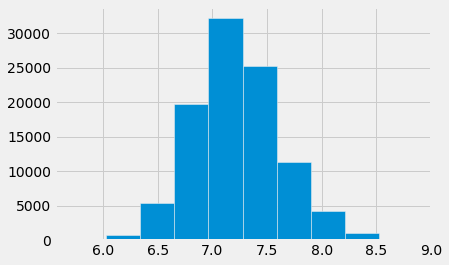

In [204]:
sim_stats = np.array([compute_one_ts() for _ in range(100000)])
plt.hist(sim_stats)

In [202]:

np.min(sim_stats)

5.654583333333334

In [203]:
office_season_viewers.where('season', 8).column('Millions of viewers').mean()

5.385416666666667

# Bread

(array([0.00055403, 0.00107594, 0.00198326, 0.00452857, 0.00847903,
        0.01686974, 0.03428548, 0.07225646, 0.11998314, 0.07170243,
        0.03473513, 0.01739968, 0.00866371, 0.0043439 , 0.00211976,
        0.00101973]),
 array([478.75, 481.25, 483.75, 486.25, 488.75, 491.25, 493.75, 496.25,
        498.75, 501.25, 503.75, 506.25, 508.75, 511.25, 513.75, 516.25,
        518.75]),
 <a list of 16 Patch objects>)

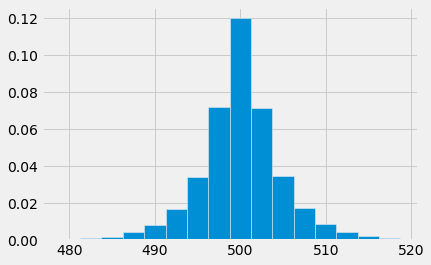

In [10]:
loaf_weights = np.random.laplace(500, 5/np.sqrt(2), size=50000) 
plt.hist(loaf_weights, bins=np.arange(480-1.25, 520+1.25, 2.5), density=True)

In [ ]:
weig

# Misc unused Qs

In [157]:
skyscrapers = Table.read_table('skyscrapers_v2.csv')
skyscrapers = skyscrapers.with_columns(
    'age', 2020 - skyscrapers.column('completed'),
    'name length', skyscrapers.apply(len, 'name')
)

skyscrapers.show(3)

In [11]:
set(skyscrapers.column('material'))

{'concrete', 'mixed/composite', 'steel'}

As a reminder, the columns are:
* **name**: A string, the name of the building
* **material**: A string, what the building is made out of: one of steel, concrete, or mixed/composite (for a combination)
* **city**: A string, what city the building is in
* **height**: A float, the height of the building in meters
* **completed**: An int, the year the building was completed
* **age**: An int, how many years ago the building was completed
* **name length**: an int, how many characters long the building's name is

(2 points) Generate a plot to determine if there is any association between the age of the building and its height.

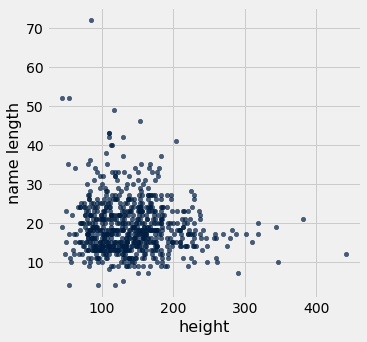

In [19]:
skyscrapers.where('material', 'steel').scatter('height', 'name length')

[REMOVED]
(2 points) Add a column to the `food_access` table called `low_access_10_pct_answer`, which has the percentage of people in each county who live more than ten miles away from their nearest grocery store. 

* *Hint*: the new column should have values between 0 and 100.
* *Hint*: you can check your answer using the `low_access_10_pct` column defined at the start of the next subpart.